**Purpose:** Following along the codes from the 9th chapter (Matrix Algebra to Solve a Linear Regression) of Applied Multivariate Statistics in R from UW\
**Date:** February 22, 2026

# What is done here -


1.   A linear model is manually fitted
2.   lm() function is then used to fit a linear model for the same data
3.   Residuals from both models are compared to show that the two models are the same

In [1]:
# Load packages
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.2
✔ purrr     1.2.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# read data
df <- read.csv("/content/chlorella.csv", header = TRUE, row.names = 1)
head(df)

,x,y
,<int>,<dbl>
1,20,1.73
2,20,1.65
3,20,2.02
4,20,1.89
5,21,2.61
6,24,1.36


In [3]:
# Look at the structure of the data
str(df)

'data.frame':	11 obs. of  2 variables:
 $ x: int  20 20 20 20 21 24 44 60 90 94 ...
 $ y: num  1.73 1.65 2.02 1.89 2.61 1.36 2.37 2.08 2.69 2.32 ...


In [4]:
# Dimension of data
dim(df)

[1] 11  2

In [5]:
# Wrangle the data
X <- df |>
  mutate(int =1, y = NULL) |>
  rename(light = x) |>
  relocate(int) |>
  as.matrix()
X

,int,light
1,1,20
2,1,20
3,1,20
4,1,20
5,1,21
6,1,24
7,1,44
8,1,60
9,1,90
10,1,94


In [6]:
# Solve the equation for coefficients
b <- solve(t(X) %*% X) %*% (t(X) %*% df$y)
b

int,1.58095214
light,0.01361776


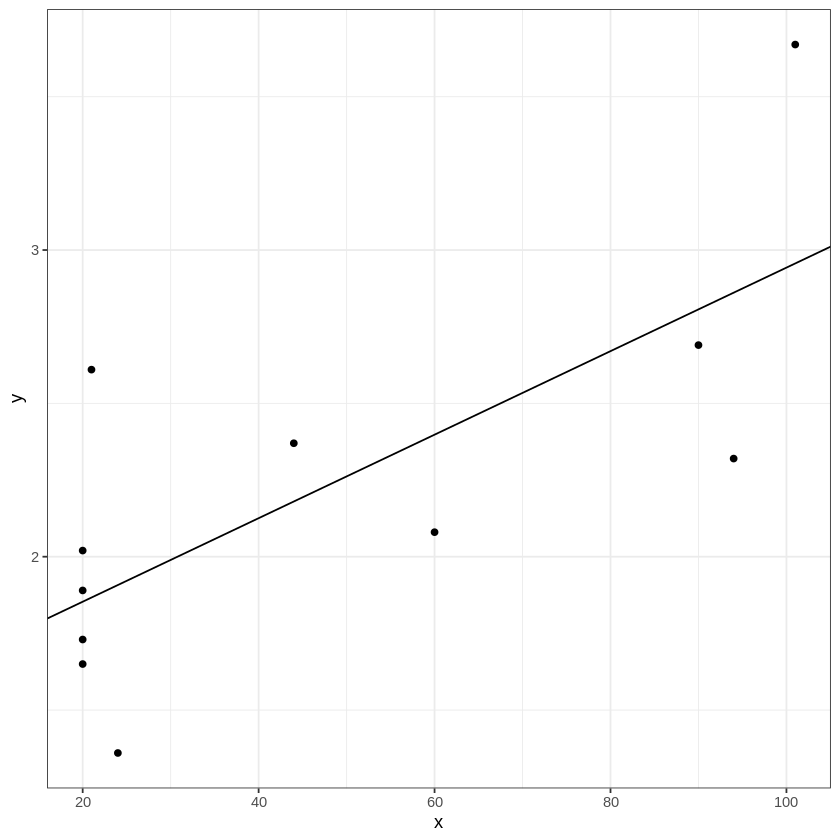

In [7]:
# Visualize
df |>
  ggplot(aes(x = x, y = y)) +
  geom_point() +
  geom_abline(intercept = b[1], slope = b[2]) +
  theme_bw()

In [8]:
# Verify
lin_mod <- lm(y ~ x, data = df)
summary(lin_mod)


Call:
lm(formula = y ~ x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5478 -0.2607 -0.1166  0.1783  0.7431 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.580952   0.244519   6.466 0.000116 ***
x           0.013618   0.004317   3.154 0.011654 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4583 on 9 degrees of freedom
Multiple R-squared:  0.5251,	Adjusted R-squared:  0.4723 
F-statistic: 9.951 on 1 and 9 DF,  p-value: 0.01165


In [9]:
# Check residuals from the two methods
## Residuals from the manually fitted model
df <- df |>
  mutate(y_pred = X %*% b) |>
  mutate(residuals = y - y_pred)

# check if residuls from the two models are identical
all(round(residuals(lin_mod), 2) == round(as.vector(df$residuals), 2))

[1] TRUE

In [10]:
sessionInfo()

R version 4.5.2 (2025-10-31)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lubridate_1.9.4 forcats_1.0.1   stringr_1.6.0   dplyr_1.1.4    
 [5] purrr_1.2.1     readr_2.1.6     tidyr_1.3.2     tibble_3.3.1   
 [9] ggplot2_4.0.1   tidyverse_2.0.0

loa